In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
from keras import backend as K
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Dropout, Activation, Flatten
from tensorflow.keras import layers, activations

In [2]:
base_dir =r"C:\Users\burha\Desktop\Tensorflow\images"

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1)
test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1)
train_datagen = train_datagen.flow_from_directory(base_dir, target_size=(500,500), subset="training", batch_size=2)
test_datagen = test_datagen.flow_from_directory(base_dir, target_size=(500,500), subset="validation", batch_size=2)
print(train_datagen)

Found 529 images belonging to 2 classes.
Found 57 images belonging to 2 classes.


(2, 500, 500, 3)
[0. 1.]


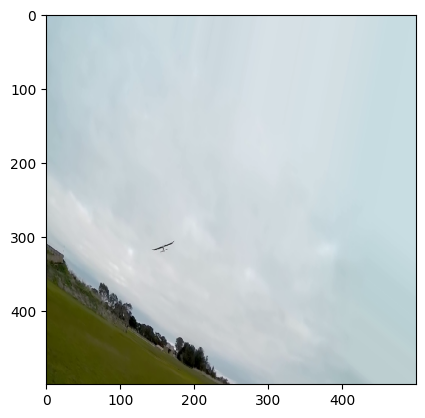

(2, 500, 500, 3)
[0. 1.]


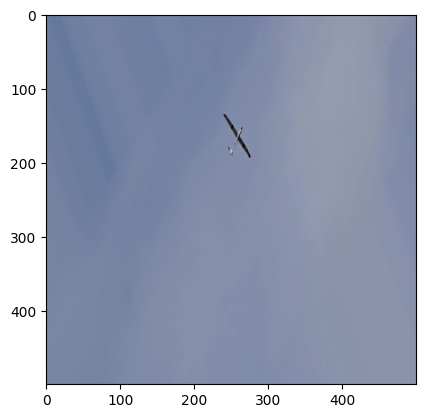

In [3]:
for i in range(2):
    images, label = test_datagen.next()
    print(images.shape)
    plt.imshow(images[0])
    print(label[0])
    plt.show()

In [4]:
model = Sequential()
model.add(layers.Conv2D(filters=4, activation="elu",kernel_size=(5,5),input_shape=(500,500,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(filters=8, activation="elu",kernel_size=(3,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(filters=16, activation="elu",kernel_size=(2,2)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(filters=32, activation="elu",kernel_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(50, activation="elu"))
model.add(layers.Dense(150, activation="elu"))
model.add(layers.Dense(120, activation="elu"))
model.add(layers.Dense(50, activation="elu"))
model.add(layers.Dense(2, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 496, 496, 4)       304       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 248, 248, 4)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 246, 246, 8)       296       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 123, 123, 8)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 122, 122, 16)      528       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 61, 61, 16)       0

In [5]:
optimizer = tf.keras.optimizers.Adamax(learning_rate=0.001)
loss = tf.keras.losses.CategoricalCrossentropy()

In [6]:
model.compile(optimizer=optimizer, loss = loss, metrics=["mse","accuracy"])
result = model.fit(train_datagen, epochs=5, verbose=1, validation_data=test_datagen)

Epoch 1/5
265/265 [==============================] - 50s 183ms/step - loss: 0.8135 - mse: 0.2673 - accuracy: 0.5558 - val_loss: 0.6387 - val_mse: 0.2279 - val_accuracy: 0.6140
Epoch 2/5
265/265 [==============================] - 45s 171ms/step - loss: 0.6556 - mse: 0.2339 - accuracy: 0.5784 - val_loss: 0.6274 - val_mse: 0.2280 - val_accuracy: 0.5439
Epoch 3/5
265/265 [==============================] - 45s 171ms/step - loss: 0.5957 - mse: 0.2077 - accuracy: 0.6541 - val_loss: 0.6025 - val_mse: 0.2109 - val_accuracy: 0.6667
Epoch 4/5
265/265 [==============================] - 46s 172ms/step - loss: 0.5311 - mse: 0.1825 - accuracy: 0.7032 - val_loss: 0.6138 - val_mse: 0.2232 - val_accuracy: 0.5965
Epoch 5/5
265/265 [==============================] - 46s 173ms/step - loss: 0.5096 - mse: 0.1734 - accuracy: 0.7391 - val_loss: 0.5776 - val_mse: 0.2125 - val_accuracy: 0.5789


In [7]:
result.history

{'loss': [0.8134912252426147,
  0.6556499004364014,
  0.5957416892051697,
  0.5310816764831543,
  0.509634792804718],
 'mse': [0.26734399795532227,
  0.2339373081922531,
  0.20767126977443695,
  0.18250583112239838,
  0.17336684465408325],
 'accuracy': [0.5557655692100525,
  0.5784499049186707,
  0.6540642976760864,
  0.703213632106781,
  0.739130437374115],
 'val_loss': [0.6386740207672119,
  0.6273890733718872,
  0.6024730205535889,
  0.6138092875480652,
  0.5775753259658813],
 'val_mse': [0.22788028419017792,
  0.2279699593782425,
  0.21092195808887482,
  0.22316986322402954,
  0.21254457533359528],
 'val_accuracy': [0.6140350699424744,
  0.5438596606254578,
  0.6666666865348816,
  0.5964912176132202,
  0.5789473652839661]}

In [8]:
#Model Testi
model.evaluate(test_datagen)

29/29 [==============================] - 1s 40ms/step - loss: 0.5776 - mse: 0.2125 - accuracy: 0.5789


[0.5775752663612366, 0.2125445455312729, 0.5789473652839661]

{'birds': 0, 'uavs': 1}
1/1 [==============================] - 0s 114ms/step
birds


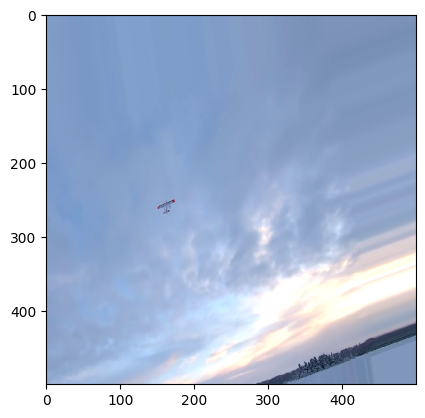

1/1 [==============================] - 0s 35ms/step
birds


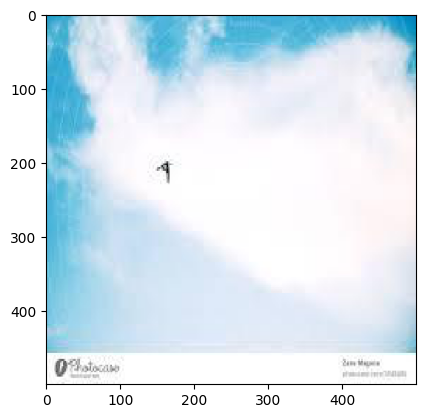

1/1 [==============================] - 0s 34ms/step
uavs


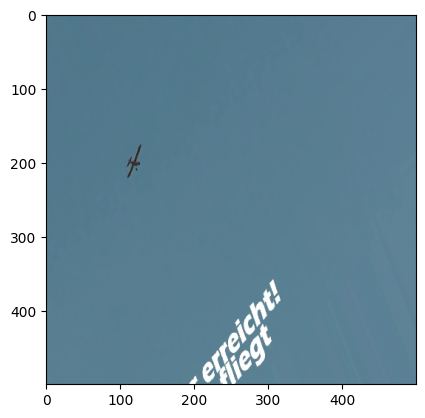

1/1 [==============================] - 0s 33ms/step
birds


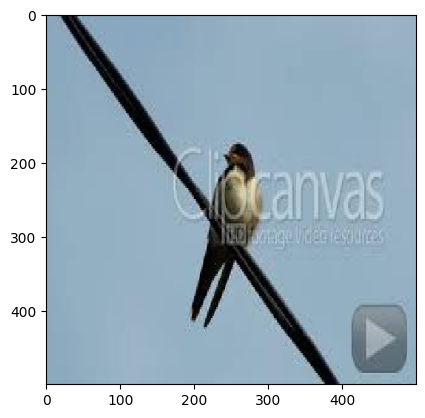

1/1 [==============================] - 0s 34ms/step
birds


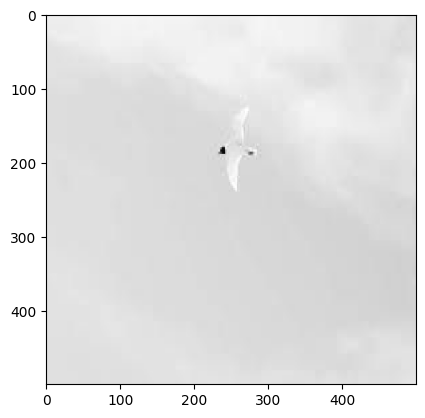

1/1 [==============================] - 0s 34ms/step
uavs


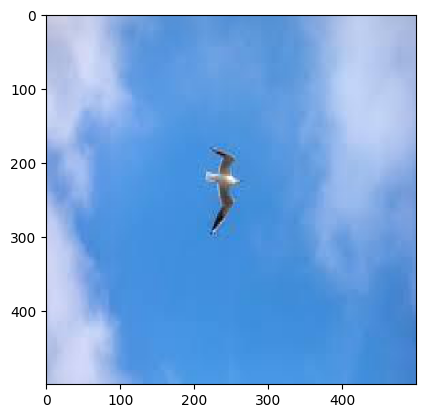

1/1 [==============================] - 0s 35ms/step
birds


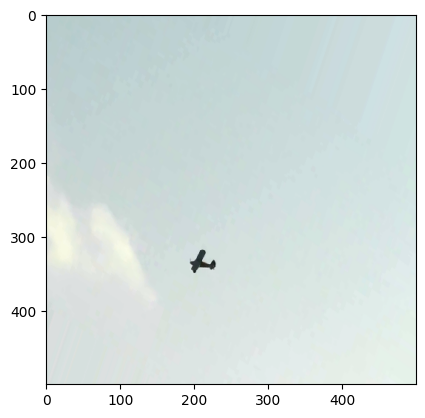

1/1 [==============================] - 0s 36ms/step
uavs


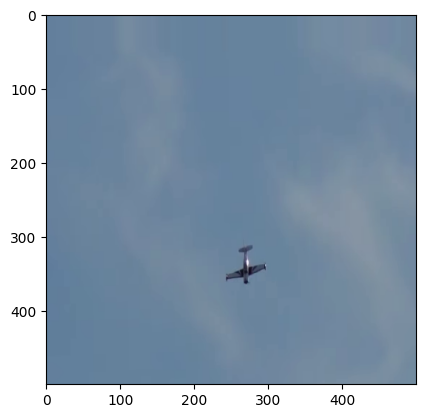

1/1 [==============================] - 0s 34ms/step
birds


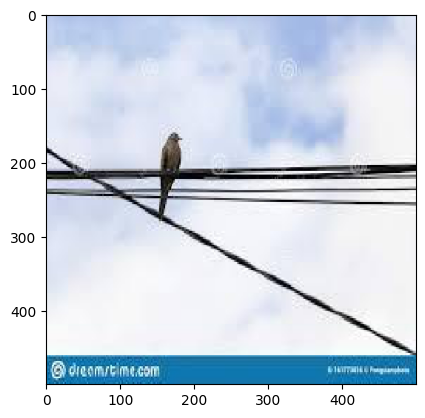

1/1 [==============================] - 0s 35ms/step
birds


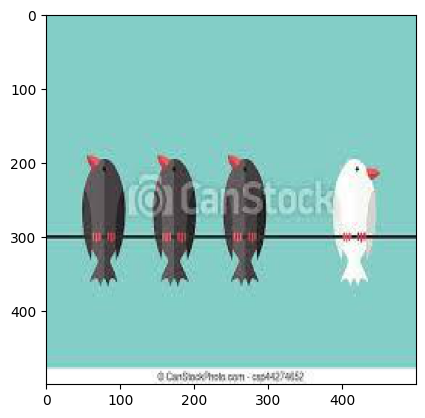

1/1 [==============================] - 0s 34ms/step
birds


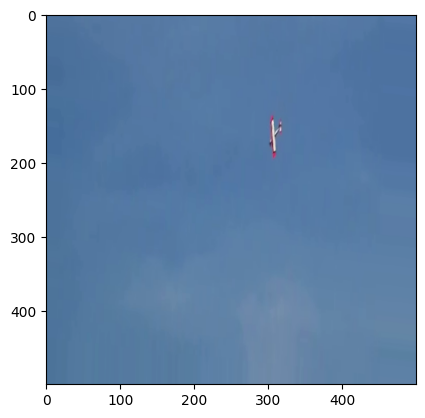

1/1 [==============================] - 0s 34ms/step
uavs


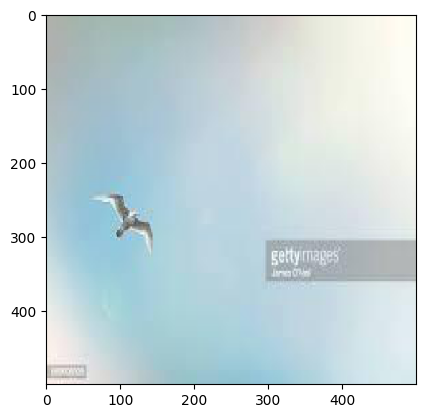

1/1 [==============================] - 0s 36ms/step
birds


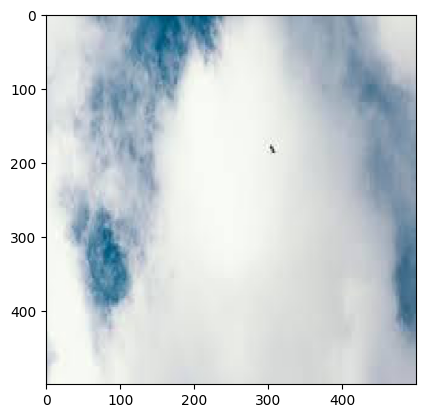

1/1 [==============================] - 0s 35ms/step
birds


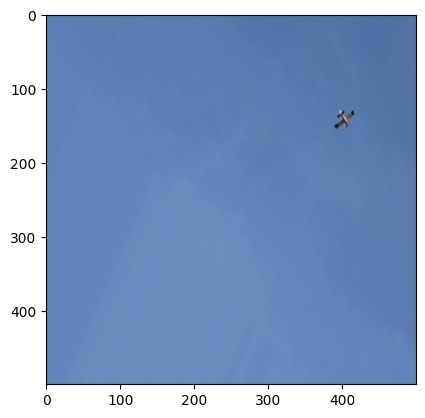

1/1 [==============================] - 0s 34ms/step
uavs


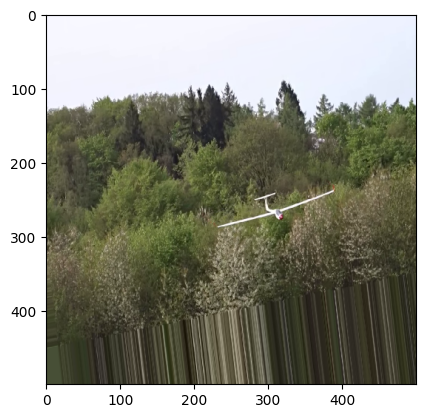

In [9]:
#Test Veri Seti Testi
print(test_datagen.class_indices)

for i in range(15):
    img, label = train_datagen.next()
    a = model.predict(img)
    np.argmax(a[0])
    plt.imshow(img[0])
    
    if np.argmax(a[0]) == 0:
        print("birds")
    if np.argmax(a[0]) == 1:
        print("uavs")
        
    plt.show()

{'birds': 0, 'uavs': 1}
1/1 [==============================] - 0s 28ms/step
[[0.9951013  0.00489878]]
0


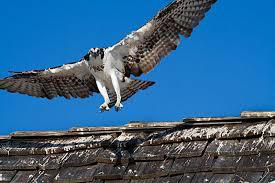

In [27]:
#Resim Testi
from PIL import Image
from skimage import transform

def resim(path):
    image = Image.open(path)
    image = np.array(image).astype("float32")/255
    image = transform.resize(image,(500,500,3))
    image = np.expand_dims(image, axis=0)
    print(test_datagen.class_indices)
    return image

image = resim(r"C:\Users\burha\Desktop\Tensorflow\images\birds\singleBirdinsky235.jpeg")
pred = model.predict(image)
print(pred)
print(np.argmax(pred))


image = Image.open(r"C:\Users\burha\Desktop\Tensorflow\images\birds\singleBirdinsky235.jpeg")
image